In [4]:
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
def read_group(file_name , groups_folder= "../plots/groups/"):
    groups = pd.read_csv(f"{groups_folder}{file_name}",index_col=0)
    groups.drop(["size","depth"],axis=1,inplace=True)
    groups["itemsets"] = groups["itemsets"].apply(lambda x : [int(i) for i in x.split()])
    
    groups["user_ids"] = groups["user_ids"].apply(lambda x : [int(i) for i in x[1:-1].split(",")])
    groups["itemset_name"] = groups["itemset_name"].apply(lambda x : [i.strip() for i in x[1:-1].split(",")])
    
    return groups

def splited_links(file_name):
    links = pd.read_csv(f"../plots/links/{file_name}")
    res = []
    links.apply(lambda x : [res.append((x["source"],x["target"], int(i) )) for i in x["user_id"].split(",")] ,axis=1)
    return  pd.DataFrame(res,columns=["source","target","user_id"])

def count_consecutives(x):
    return x.groupby((x!=x.shift()).cumsum()).transform("size")

def read_users_file():
    users = pd.read_csv("../datasets/Total/users.csv",sep=";")
    users.columns =columns=["user_id","sex","age","departement"]
    return users 

users = read_users_file()

### First time granularity 15D

In [7]:
file_name = "15D-3-[1-None]-[AGE]-lcm.out"
groups = read_group(file_name=file_name)
groups = groups[~groups.itemset_name.apply(lambda x : '' in x )]
groups.head()
groups.period.nunique()

70

Text(0, 0.5, '% of periods')

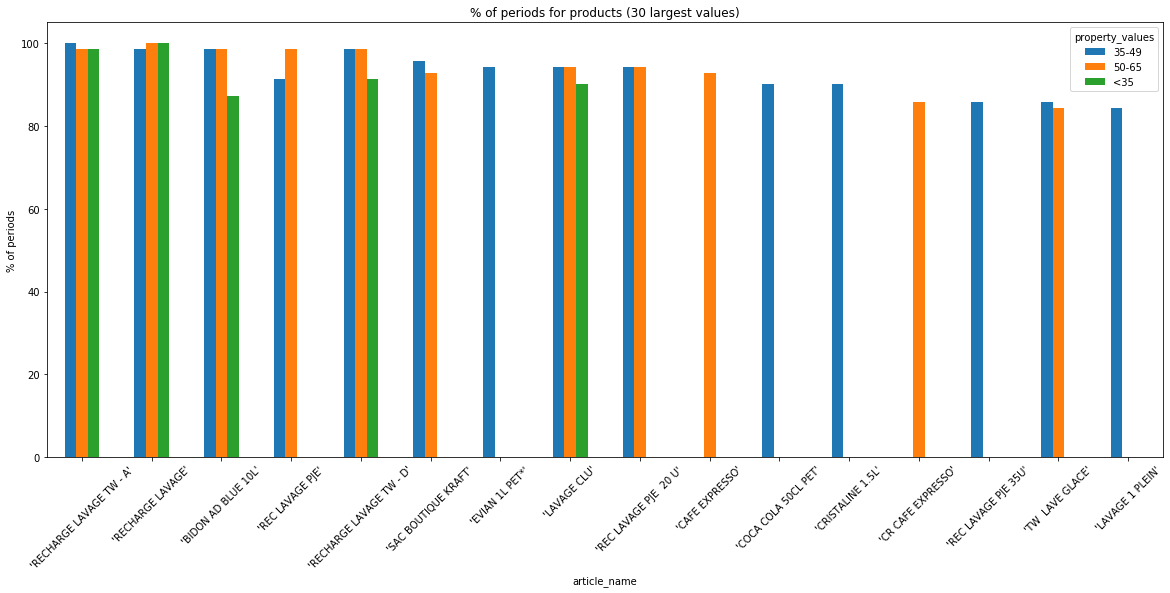

In [8]:
res = []
groups.apply(lambda x: [res.append((x["period"],x["property_values"],i,j)) for i,j in zip(x["itemsets"],x["itemset_name"])],axis=1)
stats_df = pd.DataFrame(res,columns=["period","property_values","article_id","article_name"])
stats_df.head()

ax = stats_df.groupby(["article_name","property_values"]).period.apply(lambda x : len(set(x))*100/stats_df.period.nunique()).nlargest(30).unstack().plot.bar(figsize=(20,8),title="% of periods for products (30 largest values)",rot=45)
ax.set_ylabel("% of periods")

* ['RECHARGE LAVAGE TW - A'] => 4125
* ['CAFE EXPRESSO'] => 431
* ['BIDON AD BLUE 10L'] => 4074

Text(0, 0.5, '% of periods')

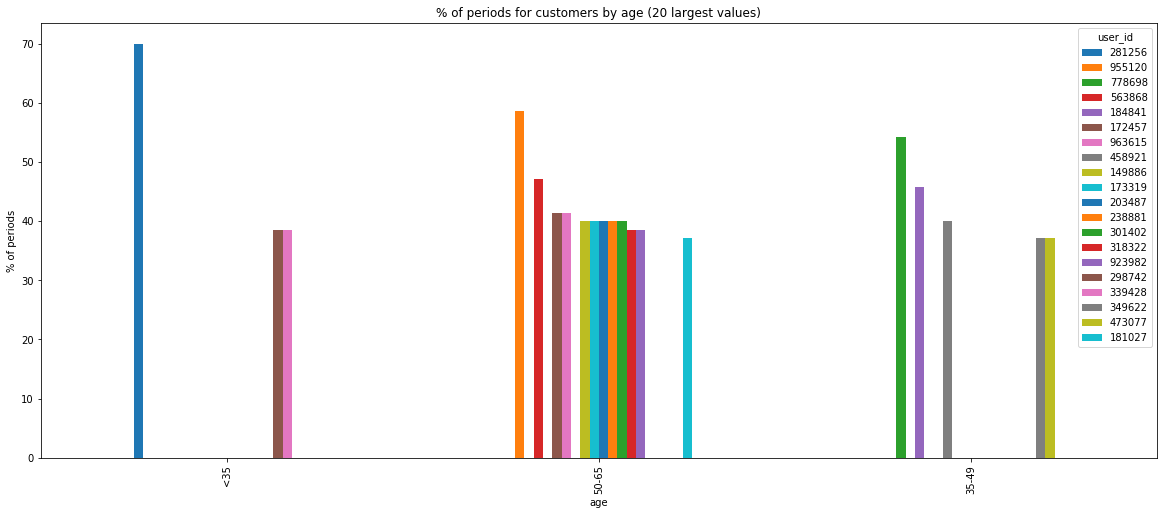

In [9]:
product_target = set([4125,431,4074])
groups_target = groups[groups.apply(lambda x : any([i in product_target for i in x["itemsets"]]),axis=1)]
res = []
groups_target.apply(lambda x :[ [res.append((user,product,x["period"])) for user in x["user_ids"]]for product in x["itemsets"]],axis=1)
users_stats = pd.DataFrame(res,columns=["user_id","product","period"])
stats_df = users_stats.merge(users).groupby(["age","user_id"]).period.apply(lambda x : len(set(x))*100/users_stats.period.nunique() ).nlargest(20)
ax = stats_df.unstack().plot.bar(figsize=(20,8),title="% of periods for customers by age (20 largest values)")
ax.set_ylabel("% of periods")


In [65]:
a= users.set_index("user_id")
a.loc[[955120,563868,172457,963615,149886,173319,203487,318322,923982,181027]]

,sex,age,departement
user_id,,,
955120,M,50-65,58
563868,M,50-65,59
172457,F,50-65,59
963615,M,50-65,78
149886,M,50-65,38
173319,M,50-65,51
203487,M,50-65,78
318322,M,50-65,59
923982,M,50-65,38


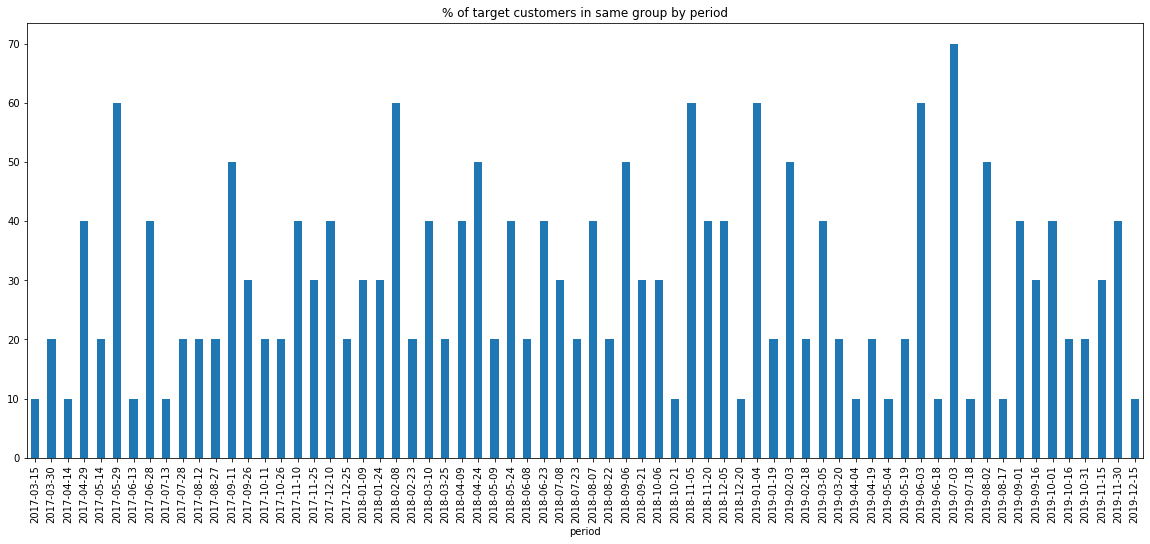

In [14]:
customers_target = set([955120,563868,172457,963615,149886,173319,203487,318322,923982,181027])
groups_target = groups[groups.apply(lambda x : customers_target.intersection(x["user_ids"])!= set(),axis=1)]
groups_target.loc[groups_target.index,"target_customers"] = groups_target.user_ids.apply(lambda x : len(customers_target.intersection(x))*100ax.set_ylabel/len(customers_target))
ax = groups_target.groupby("period").target_customers.max().plot.bar(figsize=(20,8),title='% of target customers in same group by period')

###  Interest for products : 


In [23]:
customers_target = set([955120,563868,172457,963615,149886,173319,203487,318322,923982,181027])

* ['RECHARGE LAVAGE TW - A'] => 4125
* ['CAFE EXPRESSO'] => 431
* ['BIDON AD BLUE 10L'] => 4074

### Other granularities

Text(0, 0.5, '% of customers ')

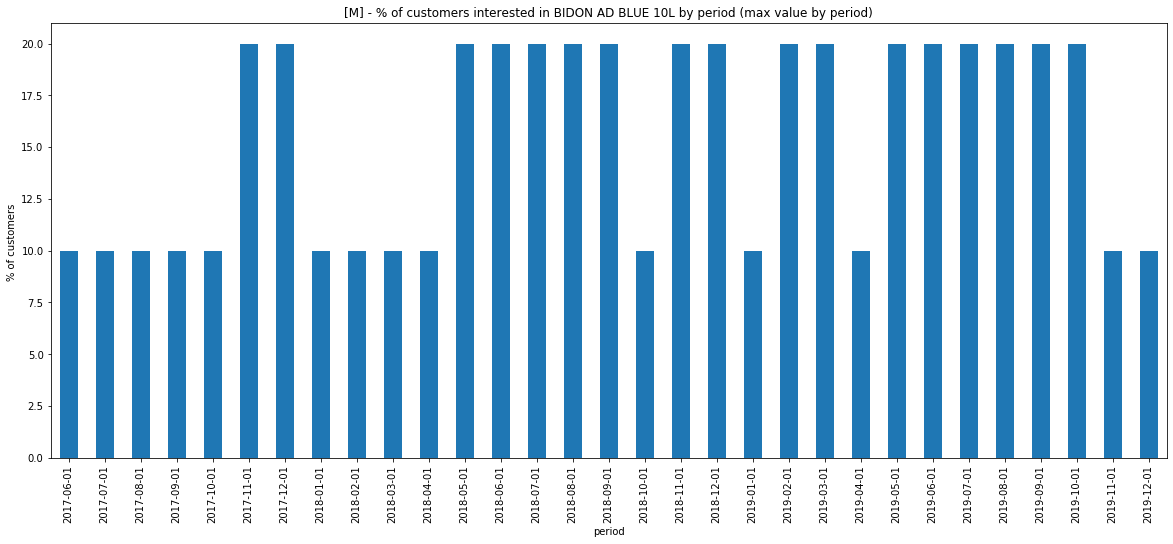

In [48]:
file_name = 'M-3-[1-None]-[AGE]-lcm.out'
file = file_name.split("-")[0]
stats_df = pd.DataFrame()
groups = read_group(file_name)

groups_target = groups[groups.apply(lambda x : customers_target.intersection(x["user_ids"])!= set(),axis=1)]
groups_target.loc[groups_target.index,"target_customers"] = groups_target.user_ids.apply(lambda x : len(customers_target.intersection(x))*100/len(customers_target))


product1 = groups_target.itemsets.apply(lambda x : 4125 in x)
product2 = groups_target.itemsets.apply(lambda x : 431 in x)
product3 = groups_target.itemsets.apply(lambda x : 4074 in x)




stats_df = groups_target[product3].groupby("period").target_customers.max()
ax = stats_df.plot.bar(figsize=(20,8),title=f"[{file}] - % of customers interested in BIDON AD BLUE 10L by period (max value by period)")
ax.set_ylabel("% of customers ")

## Products 

In [68]:
file_name = 'M-3-[1-None]-[AGE]-lcm.out'
groups = read_group(file_name)
groups.head()

,user_ids,support,itemsets,period,property_values,AGE,itemset_name
0,"[107874, 107966, 112041, 113297, 125902, 13302...",122,[4126],2017-03-01,35-49,35-49,['RECHARGE LAVAGE']
1,"[124990, 383585, 429540, 463457, 466946, 542068]",6,[3275],2017-03-01,50-65,50-65,['SDW CLA JBON BEURRE 125G']
2,"[120248, 121128, 129748, 164308, 344630]",5,[4132],2017-03-01,50-65,50-65,['LAVAGE 3 PLEIN']
3,"[124990, 140591, 233959, 241319, 266265, 27876...",7,[6723],2017-03-01,50-65,50-65,['SAN PELLEGRINO 50CL']
4,"[187833, 198513, 518210, 576233]",4,[721],2017-03-01,50-65,50-65,['BD. PAIN CHOCOLAT PAC']


Text(0, 0.5, '% of groups ')

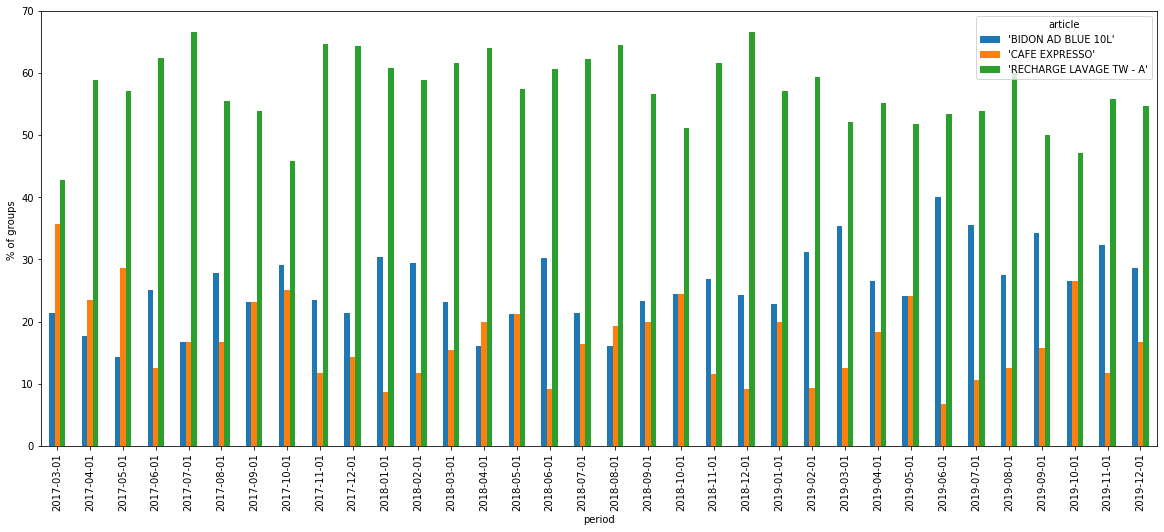

In [98]:
res = []
groups.apply(lambda x : [res.append((i,x["period"],x["property_values"])) for i in x["itemset_name"]],axis=1)
stats_df = pd.DataFrame(res,columns=["article","period","property_values"])
stats_df = stats_df [stats_df.article.isin(["'RECHARGE LAVAGE TW - A'","'CAFE EXPRESSO'","'BIDON AD BLUE 10L'"])]
stats_df = stats_df.groupby(["period"]).article.value_counts(normalize=True).apply(lambda x : 100*x).unstack()
ax = stats_df.plot.bar(figsize=(20,8))
ax.set_ylabel("% of groups ")

In [195]:
# Considering most frequent  

stats_df = pd.DataFrame(res,columns=["article","period","property_values"])
selected_produtcs = (stats_df.groupby("article").period.nunique().sort_values(ascending=False)).index.unique()[:20]
stats_df = stats_df[stats_df.article.isin(selected_produtcs)]
stats_df = stats_df.groupby(["period"]).article.value_counts(normalize=True).apply(lambda x : 100*x).unstack()


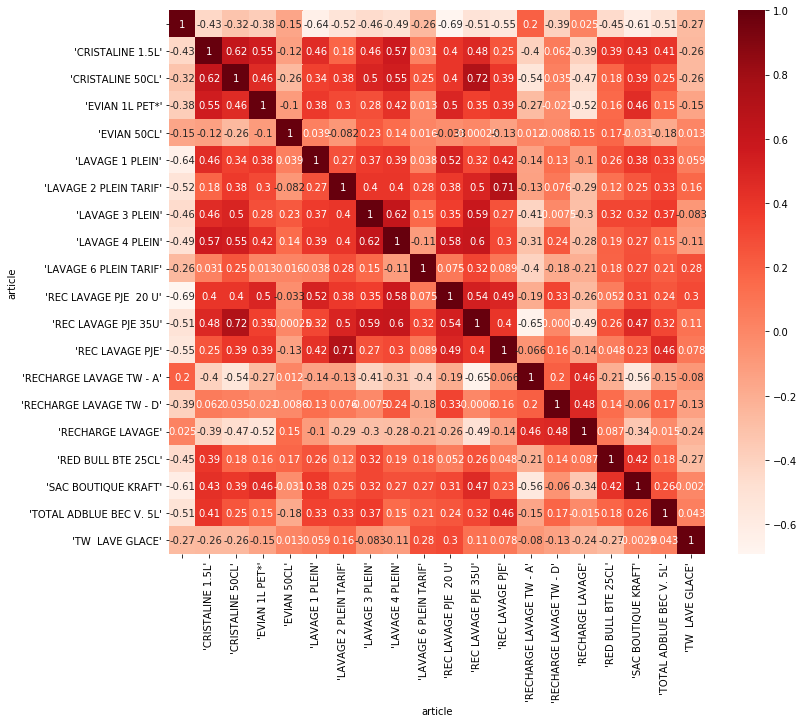

In [196]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = stats_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

["'CRISTALINE 1.5L'", "'LAVAGE 4 PLEIN'", "'REC LAVAGE PJE 35U'", "'CRISTALINE 50CL'", "'REC LAVAGE PJE'", "'LAVAGE 2 PLEIN TARIF'", "'LAVAGE 3 PLEIN'"]


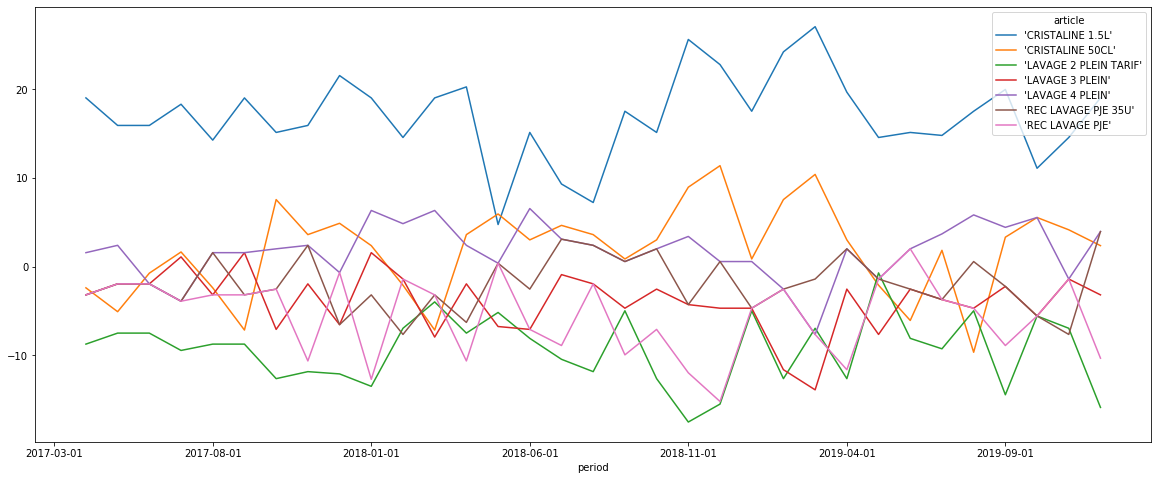

In [246]:
correlated = set(cor[(cor>0.6)&(cor<1)].stack().dropna().to_frame().index.get_level_values(1).tolist())
# correlated =correlated.union(cor[(cor>0.7)&(cor<1)].stack().dropna().to_frame().index.get_level_values(1).tolist())
correlated = list(set(correlated))
print(correlated)
stats_df = pd.DataFrame(res,columns=["article","period","property_values"])
stats_df = stats_df[stats_df.article.isin(correlated)]

stats_df = stats_df.groupby(["period"]).article.value_counts(normalize=True).apply(lambda x : 100*x).unstack()


stats_df = (stats_df.shift() -stats_df).cumsum()

# ax = stats_df.plot.bar(figsize=(20,8))
# ax.set_ylabel("% of groups ")
stats_df.plot.line(figsize=(20,8))

{'',
 "'LAVAGE 1 PLEIN'",
 "'REC LAVAGE PJE  20 U'",
 "'REC LAVAGE PJE 35U'",
 "'RECHARGE LAVAGE TW - A'",
 "'SAC BOUTIQUE KRAFT'"}